In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import pandas as pd
from scipy.signal import lombscargle
rng = np.random.default_rng()

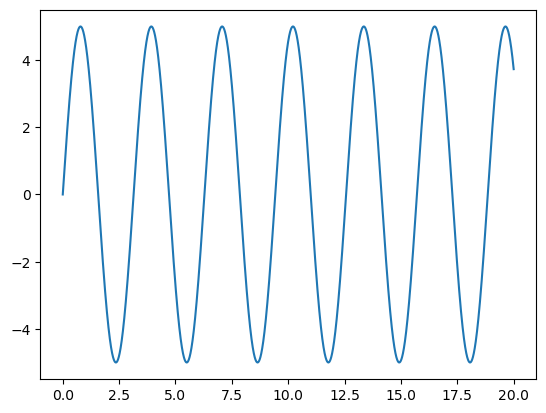

In [48]:
days = 20 #duration of the observation (in days)
dt = 60/86400 #time step between observations
x = np.arange(0,days,dt)
pts = len(x)

NoiseList = np.arange(0,10.004,0.05) # The noise level goes from 0 to 10. As A = 5, the upper SNR is 0.5.
NoiseScale = 1
A = 5.0 # The amplitude.
w0 = 2 # The period.

y = A*np.sin(w0*x) #- 1.25*np.cos(1.5*x) + 1*np.sin(3*x) - 0.75*np.sin(x) + 0.5*np.cos(0.5*x)
#y = A * np.cos(w0*x)
plt.plot(x,y);
np.random.seed(3)

err = np.random.normal(scale=NoiseScale,size=pts) # This generates the noise.
y_err = y + err

In [49]:
def Lares_LombScargle(X,y): # This is what I used from your code.
    flux = y
    from astropy.timeseries import LombScargle
    import numpy as np
    # time = corrected_data[:,0]
    time = X
    # flux = corrected_data[:,c]                                                               #in [$e^{-}s^{-1}$]
    #flux = ((y-y.mean())/y.mean())*10**3
    #flux = ((corrected_data[:,c]-corrected_data[:,c].mean())/corrected_data[:,c].mean())*10**3 # in[ppt] # *10**6 in [ppm]
    # flux = ((np.log10(corrected_data[:,3]/1.74e5)/(-0.4))+12.0)                              #in [mag] # *10**-3 in[mmag] FOR KEPLER
    # flux = (-2.5*np.log10(corrected_data[:,3])+20.44)#in [mag]                               # *10**-3 in[mmag] FOR TESS


    plt.figure(1,figsize=(7,6))
    # plt.title('KIC 5950759: HADS example', fontsize='18')
    plt.xlabel('Time [days]', fontsize='18')
    plt.ylabel('Flux [$e^{-}s^{-1}$]', fontsize='18')


    plt.plot(time, flux, '.')
    ls = LombScargle(time,flux)

    frequencies, power = ls.autopower(nyquist_factor=1,normalization='psd',maximum_frequency=1)
    frequencies = 20*(frequencies/np.pi)

    plt.figure(2,figsize=(8,7))
    # plt.title('KIC 5950759: HADS example', fontsize='18')

    plt.xlabel('Frequencies [$d^{-1}$]', fontsize='18')


    #POWER SPECTRUM
    # plt.ylabel('Power [$ppt^2$]', fontsize='18')
    plt.plot(frequencies, power) 
    print(frequencies[np.argmax(power)])
    #AMPLITUDE SPECTRUM
    # plt.ylabel('Amplitude [$ppt$]', fontsize='18')
    # plt.plot(frequencies, 2*np.sqrt(power/len(time)))

In [50]:
def error_LombScargle(x,y_err,w0,nout,NoiseScale): # This is what I adapted to my purposes. Takes a list of noise levels and runs each.
  import numpy as np
  from scipy.signal import lombscargle
  from astropy.timeseries import LombScargle

  percentErr = np.array([])
  absErr = np.array([])
  for i in range(len(NoiseScale)):
    
    w = np.linspace(0.01, 10, nout)
    err = np.random.normal(scale=NoiseScale[i],size=len(x))
    y_err = y + err
    
    #pgram = lombscargle(x, y_err, w, normalize=True)

    time = x
    flux = y_err
    ls = LombScargle(time,flux)

    #frequencies, power = ls.autopower(nyquist_factor=1,normalization='psd',maximum_frequency=5)
    power = ls.power(w)
    #frequencies = 20*(frequencies/np.pi)
    frequencies = w
    
    #periodDet = w[np.argmax(pgram)]
    periodDet = frequencies[np.argmax(power)]*2*np.pi

    percentErr = np.append(percentErr,100*(abs(w0-periodDet)/w0))
    absErr = np.append(absErr,abs(w0-periodDet))

  return absErr, percentErr

2.005421915663286


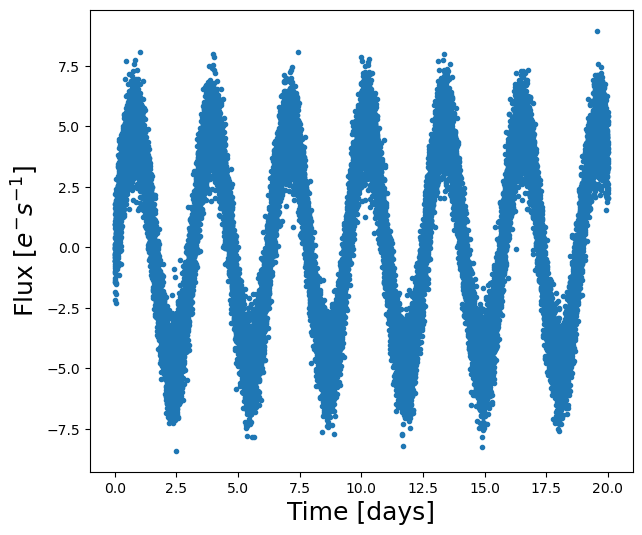

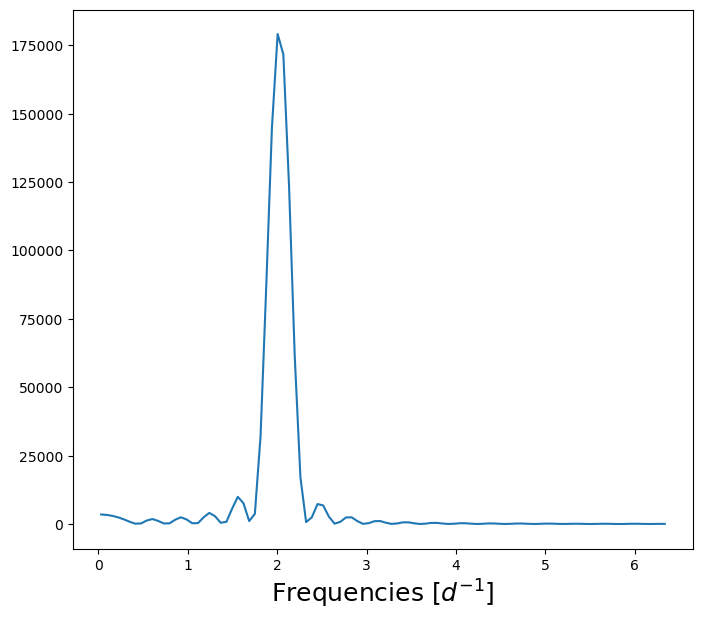

In [51]:
Lares_LombScargle(x,y_err) # This uses your code to find the period of the data.

In [52]:
absErr, percentErr = error_LombScargle(x,y,w0,500000,NoiseList)
# This attempts to find the period, and then compares it with the actual period to determine the absolute error and percent error.
# Returns two arrays, the absolute and percent error for each noise level.

(0.0, 0.6)

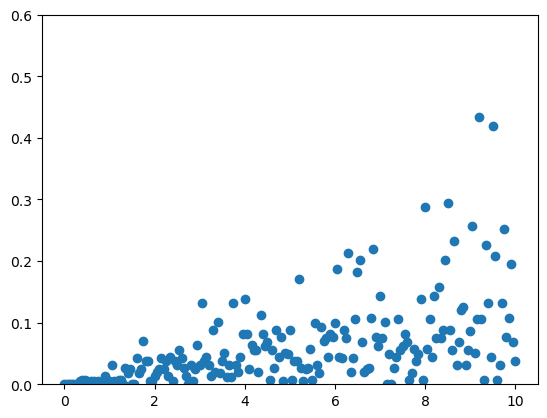

In [53]:
plt.scatter(NoiseList,percentErr)
plt.ylim(0,0.6)
# This is plotting the percent error against the noise level